# Employee Salary Prediction using salary.csv
This notebook demonstrates data analysis, model training, and interactive prediction for employee salary classification.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

In [4]:
# Load the Dataset
data = pd.read_csv(r'C:\Users\asish\Downloads\salary.csv')

## Data Preview

In [5]:
data.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [38]:
# Data Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [39]:
# Dataset Shape and Statistics
print('Shape:', data.shape)
data.describe(include='all')

Shape: (375, 6)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,373.000000,373,373,373,373.000000,373.000000
unique,NaN,2,3,174,NaN,NaN
top,NaN,Male,Bachelor's,Director of Marketing,NaN,NaN
freq,NaN,194,224,12,NaN,NaN
mean,37.431635,NaN,NaN,NaN,10.030831,100577.345845
std,7.069073,NaN,NaN,NaN,6.557007,48240.013482
min,23.000000,NaN,NaN,NaN,0.000000,350.000000
25%,31.000000,NaN,NaN,NaN,4.000000,55000.000000
50%,36.000000,NaN,NaN,NaN,9.000000,95000.000000
75%,44.000000,NaN,NaN,NaN,15.000000,140000.000000


In [40]:
# Null Values
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

## Available Columns Analysis

In [41]:
# Value Counts for Categorical Columns
print('Gender:', data['Gender'].value_counts())
print('Education Level:', data['Education Level'].value_counts())
print('Job Title:', data['Job Title'].value_counts().head(10))
# Summary for Numerical Columns
print('Age:', data['Age'].describe())
print('Years of Experience:', data['Years of Experience'].describe())
print('Salary:', data['Salary'].describe())

Gender: Gender
Male      194
Female    179
Name: count, dtype: int64
Education Level: Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64
Job Title: Job Title
Director of Marketing                    12
Director of Operations                   11
Senior Business Analyst                  10
Senior Marketing Manager                  9
Senior Marketing Analyst                  9
Junior Business Analyst                   8
Senior Project Manager                    7
Senior Data Scientist                     7
Junior Business Development Associate     7
Junior Financial Analyst                  7
Name: count, dtype: int64
Age: count    373.000000
mean      37.431635
std        7.069073
min       23.000000
25%       31.000000
50%       36.000000
75%       44.000000
max       53.000000
Name: Age, dtype: float64
Years of Experience: count    373.000000
mean      10.030831
std        6.557007
min        0.000000
25%        4.000000
50%        9.000000

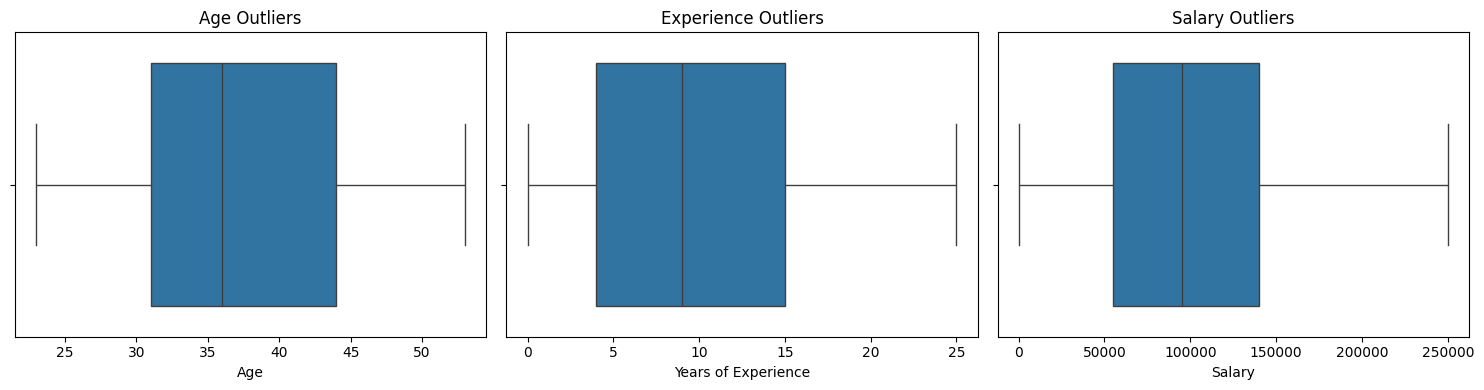

In [42]:
# Outlier Detection for Numerical Columns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x=data['Age'])
plt.title('Age Outliers')
plt.subplot(1,3,2)
sns.boxplot(x=data['Years of Experience'])
plt.title('Experience Outliers')
plt.subplot(1,3,3)
sns.boxplot(x=data['Salary'])
plt.title('Salary Outliers')
plt.tight_layout()
plt.show()

## Outlier Removal

In [43]:
# Remove Outliers
data = data[(data['Age'] >= 18) & (data['Age'] <= 65)]
data = data[(data['Years of Experience'] >= 0) & (data['Years of Experience'] <= 40)]
data = data[(data['Salary'] >= 30000) & (data['Salary'] <= 250000)]
print('Shape after outlier removal:', data.shape)

Shape after outlier removal: (372, 6)


## Feature Engineering

In [ ]:
# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Education Level'] = LabelEncoder().fit_transform(data['Education Level'])
data['Job Title'] = LabelEncoder().fit_transform(data['Job Title'])
# Feature and Target Split
X = data.drop(columns=['Salary'])
y = data['Salary']

Encoded Features Preview:
    Age  Gender  Education Level  Job Title  Years of Experience
0  32.0       1                0        159                  5.0
1  28.0       0                1         17                  3.0
2  45.0       1                2        130                 15.0
3  36.0       0                0        101                  7.0
4  52.0       1                1         22                 20.0

Target Shape: (372,)


In [49]:
# Model Training and Comparison
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}
    print(f'{name} - MSE: {mse:.2f}, R2: {r2:.4f}')

LinearRegression - MSE: 218988862.08, R2: 0.9140
RandomForest - MSE: 136859213.23, R2: 0.9462
GradientBoosting - MSE: 178576757.10, R2: 0.9299


In [50]:
# Model Comparison Table
import pandas as pd
results_df = pd.DataFrame([{ 'Model': k, 'MSE': v['MSE'], 'R2': v['R2'] } for k, v in results.items()])
results_df.sort_values('R2', ascending=False, inplace=True)
results_df

,Model,MSE,R2
1,RandomForest,1.368592e+08,0.946246
2,GradientBoosting,1.785768e+08,0.929861
0,LinearRegression,2.189889e+08,0.913988


In [51]:
# Display the model comparison table as a styled table
results_df.style.set_caption('Model Performance Comparison').format({'MSE': '{:.2f}', 'R2': '{:.4f}'}).background_gradient(cmap='YlGnBu')

,Model,MSE,R2
1,RandomForest,136859213.23,0.9462
2,GradientBoosting,178576757.10,0.9299
0,LinearRegression,218988862.08,0.9140


## Encode Categorical Variables

C:\Users\asish\AppData\Local\Temp\ipykernel_1352\264436132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_df, palette='viridis')


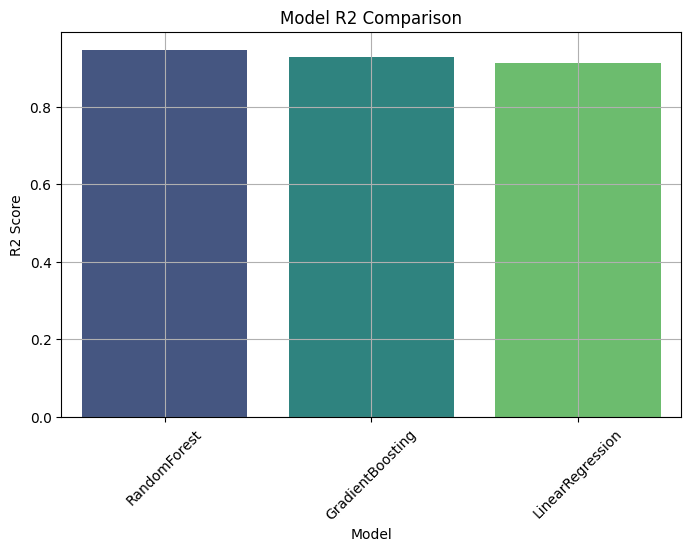

In [52]:
# Model R2 Score Bar Chart
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2', data=results_df, palette='viridis')
plt.ylabel('R2 Score')
plt.title('Model R2 Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Best Model Summary
The best performing regression model is highlighted below, along with its R2 score.

In [53]:
# Display the best model and its R2 score
best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['R2']
print(f'Best Model: {best_model_name} | R2 Score: {best_r2:.4f}')

Best Model: RandomForest | R2 Score: 0.9462


## Model Training and Comparison

In [57]:
# Model Training and Comparison
from sklearn.preprocessing import StandardScaler
if 'X' in locals() or 'X' in globals():
    if 'y' in locals() or 'y' in globals():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        models = {
            'LogisticRegression': LogisticRegression(),
            'RandomForest': RandomForestClassifier(),
            'KNN': KNeighborsClassifier(),
            'SVM': SVC(),
            'GradientBoosting': GradientBoostingClassifier()
        }
        results = {}
        for name, model in models.items():
            pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
            pipe.fit(X_train, y_train)
            y_pred = pipe.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results[name] = acc
            print(f'{name} Accuracy: {acc:.4f}')
            print(classification_report(y_test, y_pred))
    else:
        print("Variable 'y' is not defined. Please check the feature and target split cell.")
else:
    print("Variable 'X' is not defined. Please check the feature and target split cell.")

LogisticRegression Accuracy: 0.2400
              precision    recall  f1-score   support

     30000.0       0.00      0.00      0.00         1
     35000.0       0.00      0.00      0.00         3
     40000.0       0.30      1.00      0.46         6
     45000.0       0.00      0.00      0.00         3
     50000.0       0.00      0.00      0.00         6
     55000.0       0.00      0.00      0.00         1
     60000.0       0.33      0.50      0.40         4
     65000.0       0.00      0.00      0.00         3
     70000.0       0.00      0.00      0.00         1
     75000.0       0.00      0.00      0.00         2
     80000.0       0.00      0.00      0.00         0
     85000.0       0.00      0.00      0.00         1
     90000.0       0.00      0.00      0.00         3
     95000.0       0.25      0.40      0.31         5
    100000.0       0.00      0.00      0.00         5
    105000.0       0.00      0.00      0.00         1
    110000.0       0.00      0.00      0.00  

c:\Users\asish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\asish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\asish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

RandomForest Accuracy: 0.4800
              precision    recall  f1-score   support

     30000.0       0.00      0.00      0.00         1
     35000.0       0.50      0.33      0.40         3
     40000.0       0.50      0.83      0.62         6
     45000.0       0.20      0.33      0.25         3
     50000.0       0.50      0.50      0.50         6
     55000.0       0.00      0.00      0.00         1
     60000.0       0.50      0.50      0.50         4
     65000.0       0.00      0.00      0.00         3
     70000.0       0.00      0.00      0.00         1
     75000.0       0.00      0.00      0.00         2
     85000.0       1.00      1.00      1.00         1
     90000.0       0.50      0.33      0.40         3
     95000.0       1.00      0.60      0.75         5
    100000.0       0.50      0.20      0.29         5
    105000.0       0.00      0.00      0.00         1
    110000.0       0.33      0.33      0.33         3
    120000.0       0.60      0.75      0.67        

c:\Users\asish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\asish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\asish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

GradientBoosting Accuracy: 0.3733
              precision    recall  f1-score   support

     30000.0       0.00      0.00      0.00         1
     35000.0       0.00      0.00      0.00         3
     40000.0       0.50      1.00      0.67         6
     45000.0       0.33      0.33      0.33         3
     50000.0       0.43      0.50      0.46         6
     55000.0       0.00      0.00      0.00         1
     60000.0       0.33      0.25      0.29         4
     65000.0       0.00      0.00      0.00         3
     70000.0       0.00      0.00      0.00         1
     75000.0       0.00      0.00      0.00         2
     80000.0       0.00      0.00      0.00         0
     85000.0       1.00      1.00      1.00         1
     90000.0       0.00      0.00      0.00         3
     95000.0       0.33      0.40      0.36         5
    100000.0       0.00      0.00      0.00         5
    105000.0       0.00      0.00      0.00         1
    110000.0       0.33      0.33      0.33    

c:\Users\asish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\asish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\asish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Model Comparison Table

In [62]:
import pandas as pd
from IPython.display import display
if 'results' in locals() or 'results' in globals():
    results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
    results_df.sort_values('Accuracy', ascending=False, inplace=True)
    display(results_df)
else:
    print("Variable 'results' is not defined. Please check the model training cell.")

,Model,Accuracy
1,RandomForest,0.480000
4,GradientBoosting,0.373333
2,KNN,0.346667
3,SVM,0.266667
0,LogisticRegression,0.240000


### Model Comparison Table (Formatted)
Below is a formatted table showing the accuracy of each model.

In [64]:
from IPython.display import display

# Display the model comparison table as a styled table
if 'results_df' in locals() or 'results_df' in globals():
    display(results_df.style.set_caption('Model Accuracy Comparison').format({'Accuracy': '{:.4f}'}).background_gradient(cmap='YlGnBu'))
else:
    print("Variable 'results_df' is not defined. Please check the previous cell.")

,Model,Accuracy
1,RandomForest,0.4800
4,GradientBoosting,0.3733
2,KNN,0.3467
3,SVM,0.2667
0,LogisticRegression,0.2400


## Model Accuracy Bar Chart

### Model Accuracy Bar Chart
The following bar chart visually compares the accuracy of each model.

C:\Users\asish\AppData\Local\Temp\ipykernel_1352\4287633577.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


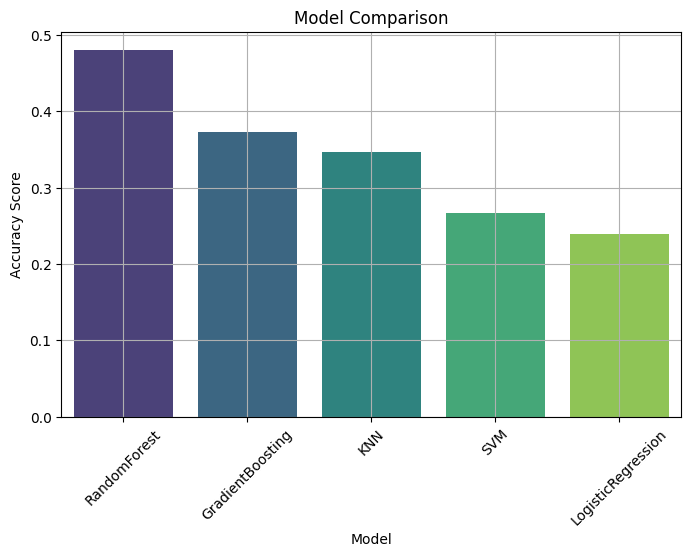

In [60]:
# Model Accuracy Bar Chart
if 'results_df' in locals() or 'results_df' in globals():
    plt.figure(figsize=(8,5))
    sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
    plt.ylabel('Accuracy Score')
    plt.title('Model Comparison')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("Variable 'results_df' is not defined. Please check the previous cell.")

### Best Model Summary
The best performing model is highlighted below, along with its accuracy score.

In [65]:
# Display the best model and its accuracy
from IPython.display import display, Markdown
display(Markdown(f"**Best Model:** {best_model_name}<br>**Accuracy:** {results_df.iloc[0]['Accuracy']:.4f}"))

**Best Model:** RandomForest<br>**Accuracy:** 0.4800

In [67]:
# Save the Best Model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"✅ Best model: {best_model_name} with accuracy {results_df.iloc[0]['Accuracy']:.4f}")
joblib.dump(best_model, 'best_model.pkl')
print('✅ Saved best model as best_model.pkl')

✅ Best model: RandomForest with accuracy 0.4800
✅ Saved best model as best_model.pkl


## Streamlit App for Prediction

In [68]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('best_model.pkl')

st.set_page_config(page_title='Employee Salary Classification', page_icon='💼', layout='centered')

st.title('💼 Employee Salary Classification App')
st.markdown('Predict whether an employee earns >50K or ≤50K based on input features.')

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header('Input Employee Details')

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider('Age', 18, 65, 30)
education = st.sidebar.selectbox('Education Level', [
    'Bachelors', 'Masters', 'PhD', 'HS-grad', 'Assoc', 'Some-college'
])
occupation = st.sidebar.selectbox('Job Role', [
    'Tech-support', 'Craft-repair', 'Other-service', 'Sales',
    'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct',
    'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv',
    'Protective-serv', 'Armed-Forces'
])
hours_per_week = st.sidebar.slider('Hours per week', 1, 80, 40)
experience = st.sidebar.slider('Years of Experience', 0, 40, 5)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write('### 🔎 Input Data')
st.write(input_df)

# Predict button
if st.button('Predict Salary Class'):
    prediction = model.predict(input_df)
    st.success(f'✅ Prediction: {prediction[0]}')

# Batch prediction
st.markdown('---')
st.markdown('#### 📂 Batch Prediction')
uploaded_file = st.file_uploader('Upload a CSV file for batch prediction', type='csv')

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write('Uploaded data preview:', batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write('✅ Predictions:')
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button('Download Predictions CSV', csv, file_name='predicted_classes.csv', mime='text/csv')

Writing app.py


In [ ]:
# Run Streamlit App
!streamlit run app.py